<a href="https://colab.research.google.com/github/JaydaBubel/Mini-Project_Loans/blob/main/Mini_Project_Loans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 6 - Predicting Loan Approval using Logistic Regression Analysis (Mini-Projekt)**

Import necessary libraries + dataset

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. A first look at the dataframe**

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Loan_Data.csv")

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
(df.isna().sum()/df.shape[0])*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

Columns credit history and self-employed have a higher % of missing values; it should be considered, to do something about those NaNs - continued under "Data Cleaning".

For the target varibale, Loan_Status will be used.

1.   List item
2.   List item



**2. Data Preparation and Cleaning**

Drop duplicate rows.

In [ ]:
df = df.drop_duplicates()

Standardizing columns; make lower case and remove underscores.

In [11]:
df.columns = df.columns.str.lower().str.replace('_', '')
df

,loanid,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Drop loan id column, as not relevant.

In [12]:
df = df.drop(['loanid'],axis=1)
df

,gender,married,dependents,education,selfemployed,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,propertyarea,loanstatus
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Check how many unique values are in each column; do they fit logically with above data types?

In [13]:
unique_counts = df.nunique()
print(unique_counts)

gender                 2
married                2
dependents             4
education              2
selfemployed           2
applicantincome      505
coapplicantincome    287
loanamount           203
loanamountterm        10
credithistory          2
propertyarea           3
loanstatus             2
dtype: int64



*A*: Yes, for example, there aren't like 20 similar but varying entries under education

In [14]:
df.select_dtypes('object')

,gender,married,dependents,education,selfemployed,propertyarea,loanstatus
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


**Data Cleaning: Dealing with NaNS**

In [15]:
nan_counts = df.isnull().sum()
print(nan_counts)

gender               13
married               3
dependents           15
education             0
selfemployed         32
applicantincome       0
coapplicantincome     0
loanamount           22
loanamountterm       14
credithistory        50
propertyarea          0
loanstatus            0
dtype: int64


Fill in gender, married, dependents, education, self-empxyled, propertyx area and loan amount term with mode. Loan Amount Term is numerical, but with 10 distinct values , therefore we grouped it in with the mode values. Likewise with dependents - there are only 4 options for values here.

In [50]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['married'] = df['married'].fillna(df['married'].mode()[0])
df['dependents'] = df['dependents'].fillna(df['dependents'].mode()[0])
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['selfemployed'] = df['selfemployed'].fillna(df['selfemployed'].mode()[0])
df['propertyarea'] = df['propertyarea'].fillna(df['propertyarea'].mode()[0])
df['loanamountterm'] = df['loanamountterm'].fillna(df['loanamountterm'].mode()[0])

In [17]:
df.select_dtypes('number').dtypes

applicantincome        int64
coapplicantincome    float64
loanamount           float64
loanamountterm       float64
credithistory        float64
dtype: object

Fill in Loan Amount and Credit History with median:

In [18]:
# in column Loan Amount, replace NaNs with the median number
median_loan_amount = df['loanamount'].median()
df['loanamount'].fillna(median_loan_amount, inplace=True)

In [19]:
# in column Credit History, replace NaNs with the median number
median_loan_amount = df['credithistory'].median()
df['credithistory'].fillna(median_loan_amount, inplace=True)

In [21]:
nan_counts = df.isnull().sum()
print(nan_counts)

gender               0
married              0
dependents           0
education            0
selfemployed         0
applicantincome      0
coapplicantincome    0
loanamount           0
loanamountterm       0
credithistory        0
propertyarea         0
loanstatus           0
dtype: int64


All NaNs have either been replace with the mode or median values.

In [22]:
#convert category dependents to integer
df['dependents'] = df['dependents'].str[:1].astype(int)
df['dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: dependents, Length: 614, dtype: int64

**3. Exploratory Data Analysis (EDA)**

In [23]:
for col in df.select_dtypes('object'):
    print (col+'\n'+str(df[col].value_counts()), '\n')

gender
Male      502
Female    112
Name: gender, dtype: int64 

married
Yes    401
No     213
Name: married, dtype: int64 

education
Graduate        480
Not Graduate    134
Name: education, dtype: int64 

selfemployed
No     532
Yes     82
Name: selfemployed, dtype: int64 

propertyarea
Semiurban    233
Urban        202
Rural        179
Name: propertyarea, dtype: int64 

loanstatus
Y    422
N    192
Name: loanstatus, dtype: int64 



*Some takeaways from looking at the general makeup of pariticpants:*

Gender: Most applicants are male (81%).

Marital Status: About 65% of applicants are married

Dependents: Around 56% of applicants have no dependents; ca. 17% have 1 dependent, ca. 16% have 2 dependents, ca. 8% have 3 or more dependents

Education Level: majority of applicants are graduates (78%), smaller portion are not graduates (22%).

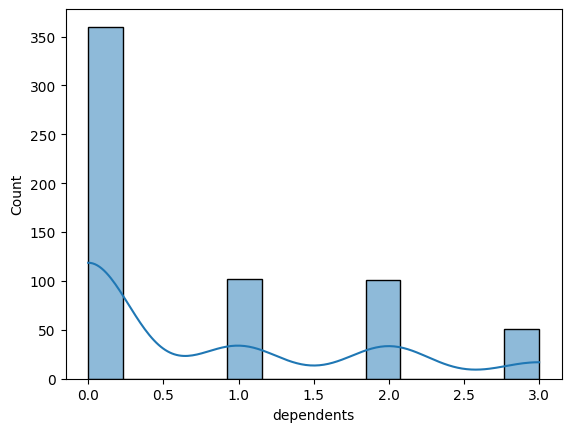

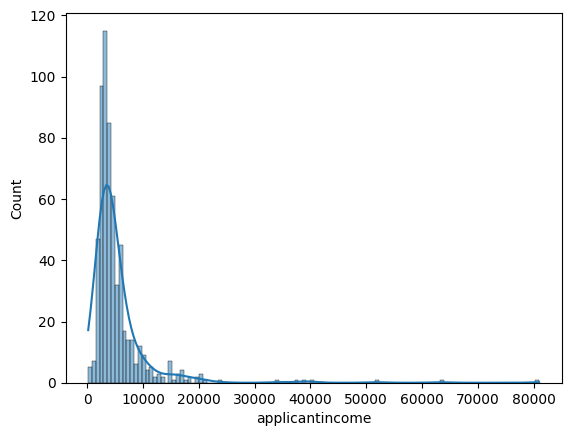

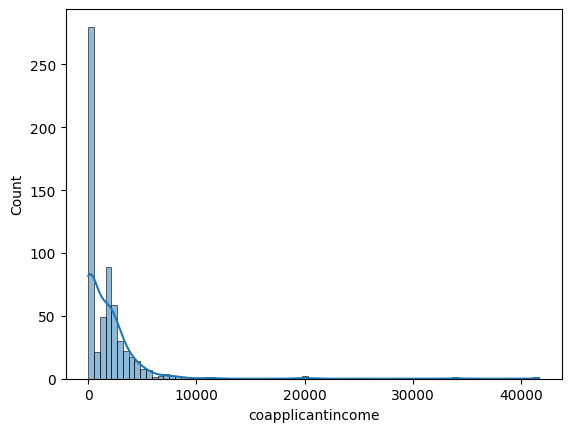

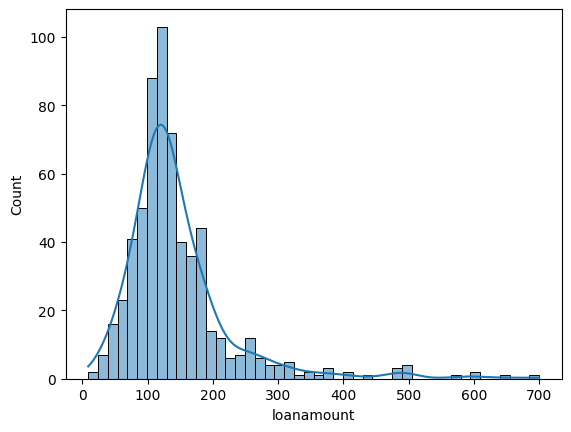

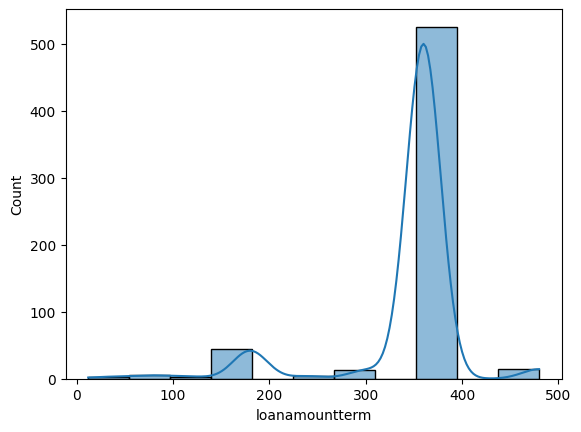

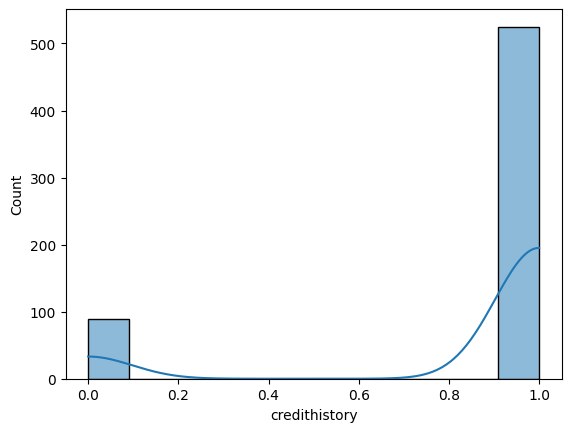

In [24]:
num_cols = df.select_dtypes('number')
for col in num_cols.columns:
  sns.histplot(num_cols[col], kde=True)
  plt.show()

**Looking at Outliers**

In [25]:
#IQR method for spotting any outliers
summary = df.describe().T
summary['iqr'] = (summary['75%'] - summary['25%']).round(2)
summary = summary.round(2)
summary

,count,mean,std,min,25%,50%,75%,max,iqr
dependents,614.0,0.74,1.01,0.0,0.00,0.0,1.00,3.0,1.00
applicantincome,614.0,5403.46,6109.04,150.0,2877.50,3812.5,5795.00,81000.0,2917.50
coapplicantincome,614.0,1621.25,2926.25,0.0,0.00,1188.5,2297.25,41667.0,2297.25
loanamount,614.0,145.75,84.11,9.0,100.25,128.0,164.75,700.0,64.50
loanamountterm,614.0,342.41,64.43,12.0,360.00,360.0,360.00,480.0,0.00
credithistory,614.0,0.86,0.35,0.0,1.00,1.0,1.00,1.0,0.00


If the IQR is large, it means there's a wide spread within the middle half of the data; if it's small, data is more tightly packed around the median.

ApplicantIncome: The IQR says that most people's incomes fall within about $2917.50 of each other in the middle part of the data.

CoapplicantIncome: the IQR shows that incomes are close together for most people in the middle range.

LoanAmount: IQR indicates that loan amounts vary by about $64.50 for most loans in the middle.

<Axes: >

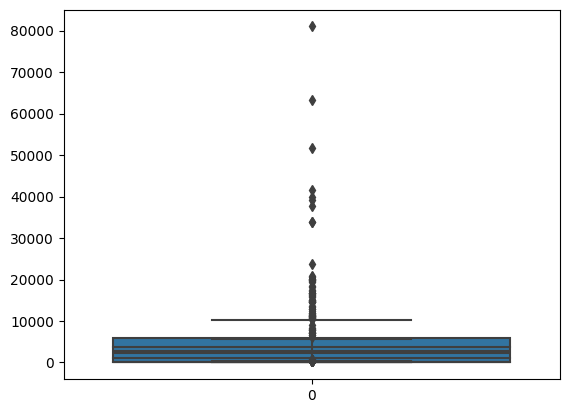

In [47]:
# identify outliers, for exmaple with category ApplicantIncome;
sns.boxplot(df["applicantincome"])

<Axes: >

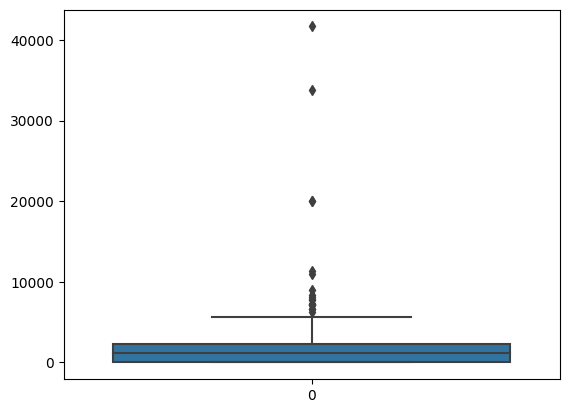

In [48]:
sns.boxplot(df["coapplicantincome"])

<Axes: >

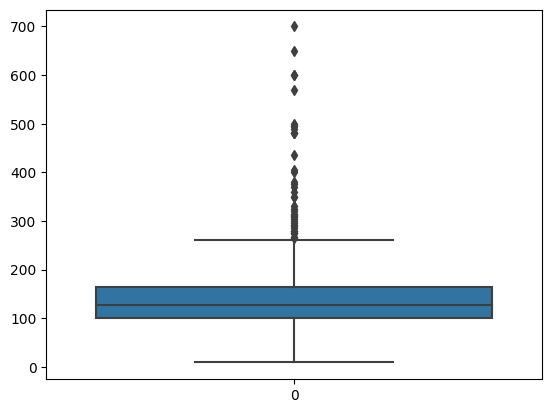

In [49]:
sns.boxplot(df["loanamount"])


Although there are some outliers , the IQR numbers indicate that the range really isn't extreme, and the outliers can likely be left in the data set this time without much consequence.

<ipython-input-33-331b1177e517>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_matrix = df.corr()  # Replace 'df' with your DataFrame


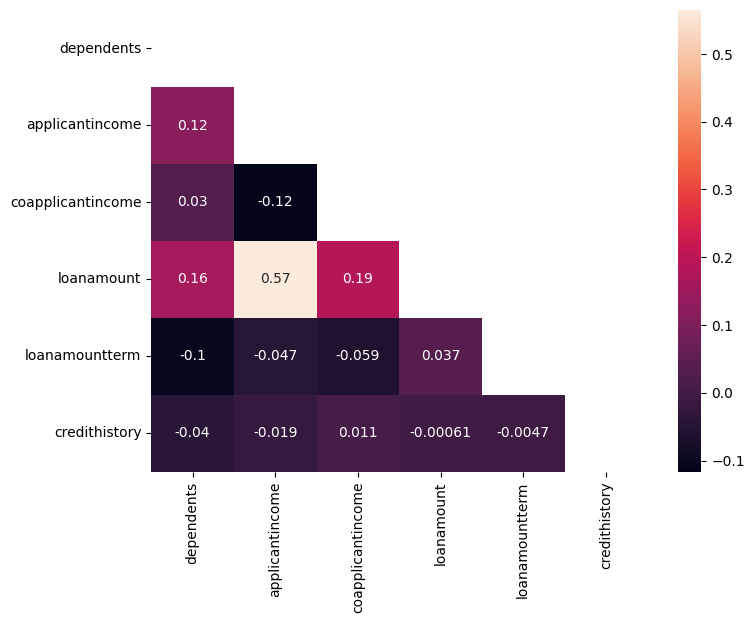

In [33]:
# Calculate the correlation matrix
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

There a no features showing a very high level of correlation with eachother: A correlation coefficient of 0.57 between "loan amount" and "applicant income" suggests a moderate positive relationship between these two variables; as applicant's income increases, the loan amount they apply for also tends to increase, but not thaaaat strongly or not necessarily in a perfectly predictable manner.

Now, looking at relationshops between categorical and numerical values:

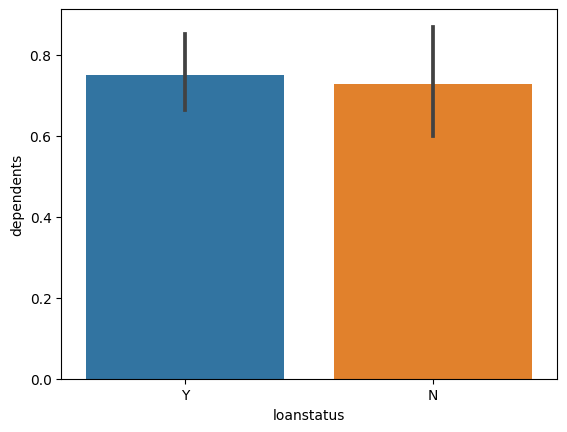

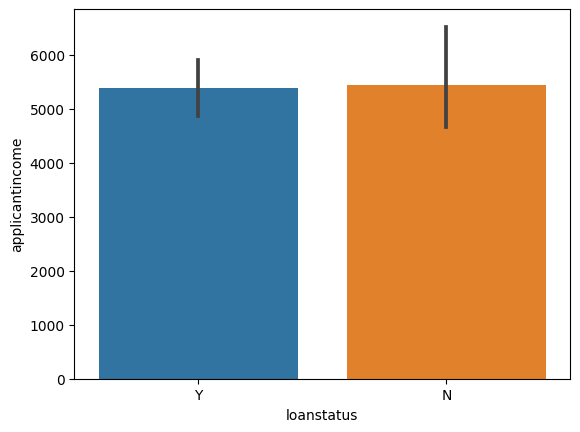

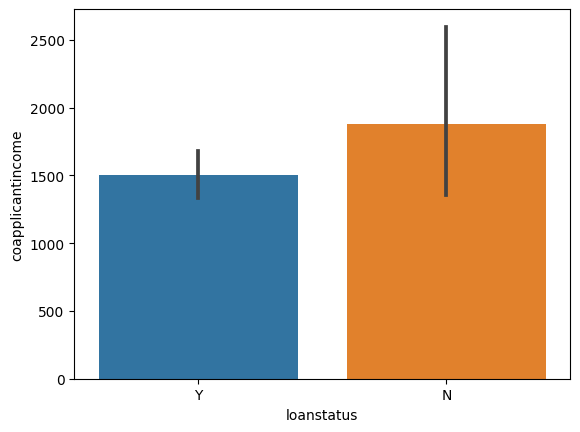

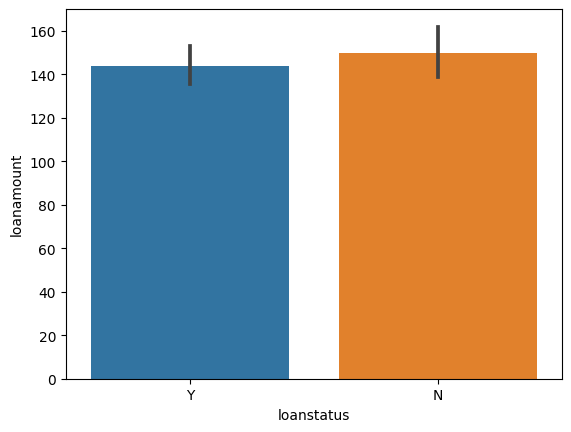

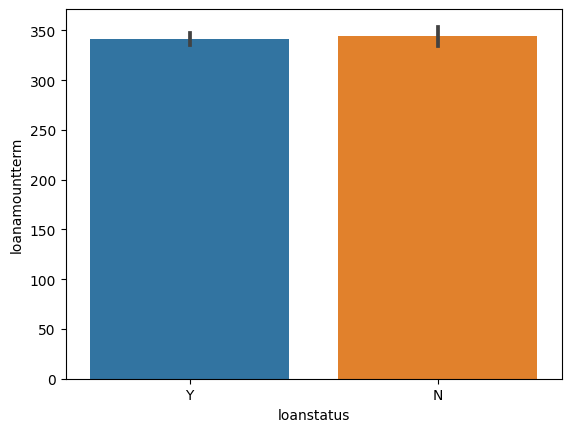

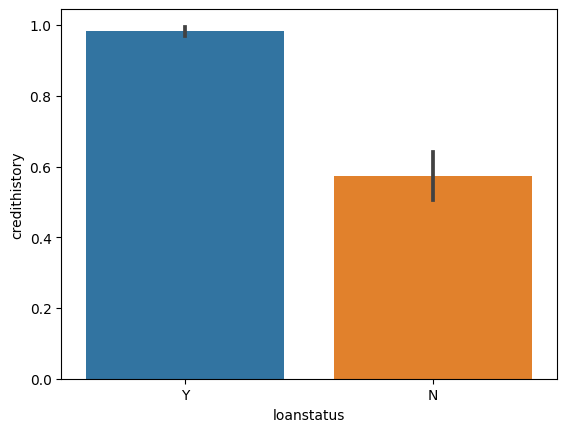

In [29]:
for col in num_cols.columns:
  sns.barplot(data=df, x='loanstatus', y=col)
  plt.show()

**Further visualizations of the categorical features**

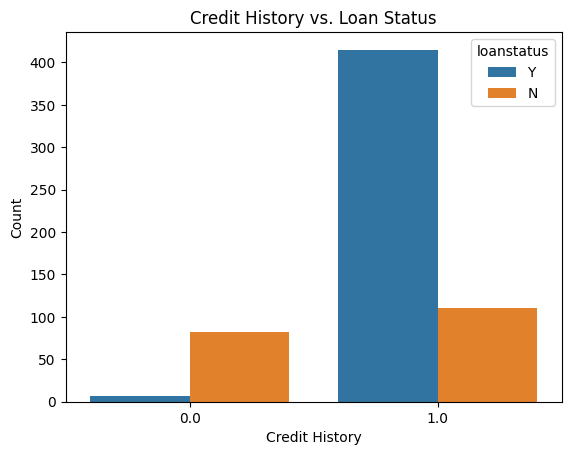

Credit History Value Counts:
1.0    525
0.0     89
Name: credithistory, dtype: int64



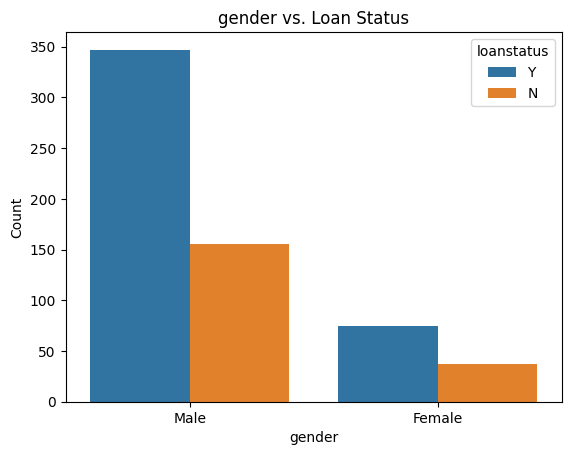

gender Value Counts:
Male      502
Female    112
Name: gender, dtype: int64



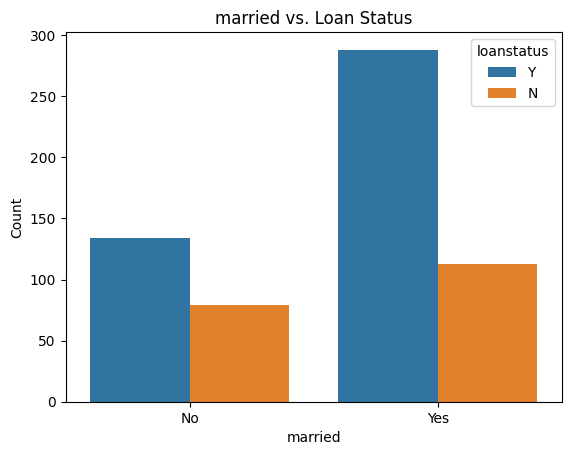

married Value Counts:
Yes    401
No     213
Name: married, dtype: int64



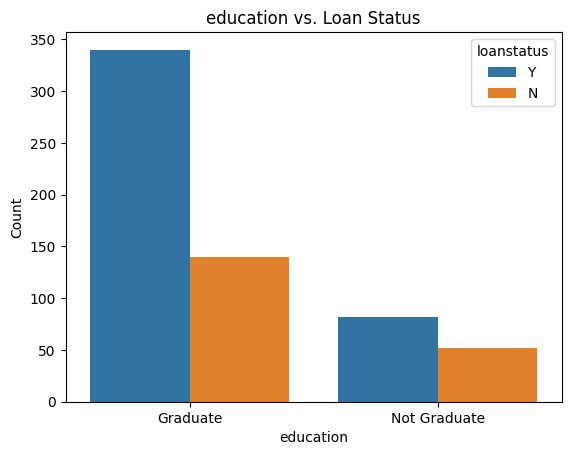

education Value Counts:
Graduate        480
Not Graduate    134
Name: education, dtype: int64



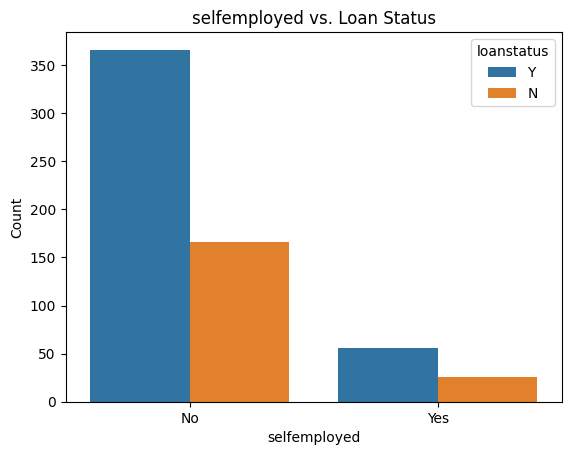

selfemployed Value Counts:
No     532
Yes     82
Name: selfemployed, dtype: int64



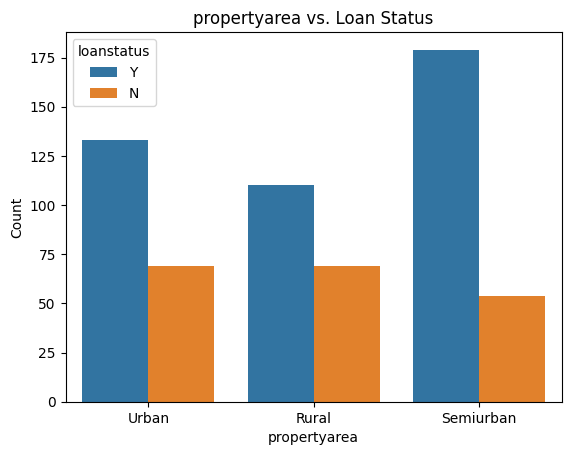

propertyarea Value Counts:
Semiurban    233
Urban        202
Rural        179
Name: propertyarea, dtype: int64



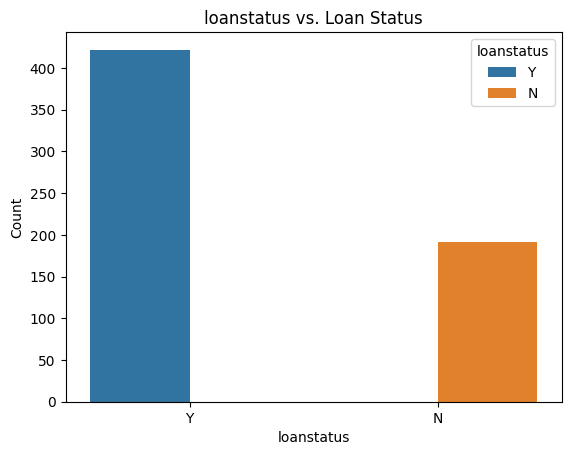

loanstatus Value Counts:
Y    422
N    192
Name: loanstatus, dtype: int64



In [32]:
sns.countplot(x='credithistory', hue='loanstatus', data=df)
plt.title('Credit History vs. Loan Status')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

# Display value counts for 'Credit History'
print("Credit History Value Counts:")
print(df['credithistory'].value_counts())
print()

# Visualize other categorical columns vs. 'Loan Status'
categorical_columns = df.select_dtypes('object').columns
for col in categorical_columns:
    sns.countplot(x=col, hue='loanstatus', data=df)
    plt.title(f'{col} vs. Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # Display value counts for the current categorical column
    print(f"{col} Value Counts:")
    print(df[col].value_counts())
    print()

**Create a contingency table to look at categorical features against target**

In [46]:
import warnings
warnings.filterwarnings('ignore')

for col in df.select_dtypes('object'):
    cont_table = pd.crosstab(df[col], df['loanstatus'])

    cont_table['Y%'] = (cont_table['Y'] / cont_table.sum(axis=1) * 100).round(1)

    cont_table.loc['_%'] = 0
    cont_table['Y'].loc['_%'] = (cont_table['Y'][0] / cont_table['Y'].sum() * 100).round(1)
    cont_table['N'].loc['_%'] = (cont_table['N'][0] / cont_table['N'].sum() * 100).round(1)

    display(cont_table)

warnings.filterwarnings('default')

loanstatus,N,Y,Y%
gender,,,
Female,37.0,75.0,67.0
Male,155.0,347.0,69.1
_%,19.3,17.8,0.0


loanstatus,N,Y,Y%
married,,,
No,79.0,134.0,62.9
Yes,113.0,288.0,71.8
_%,41.1,31.8,0.0


loanstatus,N,Y,Y%
education,,,
Graduate,140.0,340.0,70.8
Not Graduate,52.0,82.0,61.2
_%,72.9,80.6,0.0


loanstatus,N,Y,Y%
selfemployed,,,
No,166.0,366.0,68.8
Yes,26.0,56.0,68.3
_%,86.5,86.7,0.0


loanstatus,N,Y,Y%
propertyarea,,,
Rural,69.0,110.0,61.5
Semiurban,54.0,179.0,76.8
Urban,69.0,133.0,65.8
_%,35.9,26.1,0.0


loanstatus,N,Y,Y%
loanstatus,,,
N,192,0,0.0
Y,0,422,100.0
_%,100,0,0.0


Insights from the above contingency table:

*   Gender: More men applied for loans, slightly more men got approved.
*   Marital Status: Married people appear to have better chance of getting a loan.
*   Education: Graduates had a slightly better chance of loan approval.
*   Self-Employment: Being self-employed didn't make a big difference in loan approval.
*   Property Area: Semiurban areas had the highest loan approval rates.

**4. Logistic Regression Analysis: creating/running the Model**

In [36]:
y = df['loanstatus']
X = df.drop('loanstatus', axis=1)

In [37]:
#get numerical values for categorical values
X = pd.get_dummies(X, columns=X.select_dtypes('object').columns.tolist())
X

,dependents,applicantincome,coapplicantincome,loanamount,loanamountterm,credithistory,gender_Female,gender_Male,married_No,married_Yes,education_Graduate,education_Not Graduate,selfemployed_No,selfemployed_Yes,propertyarea_Rural,propertyarea_Semiurban,propertyarea_Urban
0,0,5849,0.0,128.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
1,1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [38]:
#split data into train + test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
classification = LogisticRegression(random_state=42, max_iter=1000)
classification.fit(X_train, y_train)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


LogisticRegression(max_iter=1000, random_state=42)

In [40]:
y_test.value_counts()

Y    120
N     65
Name: loanstatus, dtype: int64

0.7567567567567568

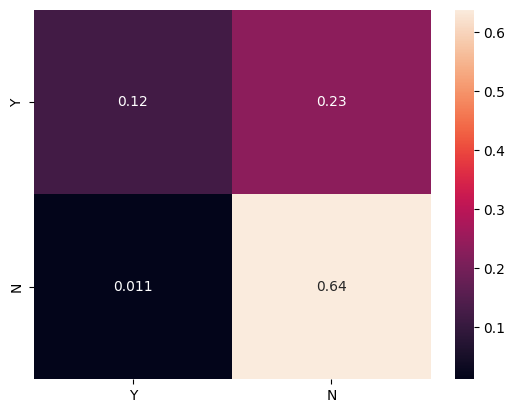

In [41]:
predictions = classification.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=classification.classes_, normalize='all')
sns.heatmap(cm, annot=True, xticklabels=["Y", "N"], yticklabels=["Y", "N"])
classification.score(X_test, y_test)

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [45]:
precision = precision_score(y_test, predictions, pos_label='Y')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, predictions, pos_label='Y')
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, predictions, pos_label='Y')
print(f"F1-Score: {f1}")

Precision: 0.7329192546583851
Recall: 0.9833333333333333
F1-Score: 0.8398576512455517


# Conclusions


In the data cleaning all NaNs were replaced with either mode or median values, depending on type of value/amount of unique values. Outliers were left in data set, as IQR values relatively low. Using logisitc regression with the cleaned data set, the following scores were achieved:

The score of approx. **0.757** suggests that the model correctly predicted the outcome (loan approval or denial) for ca. 75.7% of test cases- this is the measure of the model's overall accuracy in making predictions.

Precision (**0.7329**): When the model says "yes" for loan approval, it's right about 73.29% of the time.

Recall (**0.9833**): The model dientifies nearly 98.33% of all approved loans- good for avoiding missed approvals.

F1-Score (**0.8399**): The F1-Score (ca. 83.99%) balances accuracy in positive predictions with finding all approved loans.
